# Gene weight by age interval

To see if the gene-frequencies are significantly different than we expect across our age-intervals, we need to know what we expect. Part of our expectation is boun in the frequency of individuals in each age group, but that would be under the assumption that we have tested for the same genes the same amount of times across the age-intervals. This might not be true, and to handle that we must find all the age-interval specific gene weights.

We proceed in a similar fashion as in the gene_weights script.

## Setup

In [1]:
library("ggplot2")
library(stringr)
library(data.table)
library('dplyr')

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Loading Data

#### Sample data

In [2]:
# We get the sample data
sample_data <- read.table("../../data/genie_v15/data_clinical_sample.txt", sep="\t", quote="", head=TRUE)

# And check dimensions and the first five rows
dim(sample_data)
#head(sample_data)

[1] 198041      9

In [3]:
patient_data <- read.table("../../data/genie_v15/data_clinical_patient.txt", sep="\t", quote="", head=TRUE)

dim(patient_data)
#head(patient_data)

[1] 172005     10

In [4]:
# I need patient data for information on sex, so we select PATIENT_ID and SEX and no other columns
patient_data <- patient_data[,1:2]

# Then we merge sample- and patient-data
sample_data <- left_join(sample_data, patient_data, join_by(PATIENT_ID))

#### Gene-panels

In [5]:
# Getting the gene-panels data is slightly more complicated

# We start by creating a list of all the files
gene_panels_list <- "data_gene_panel_CHOP-COMPT.txt
data_gene_panel_CHOP-COMPT-V2.txt
data_gene_panel_CHOP-FUSIP.txt
data_gene_panel_CHOP-HEMEP.txt
data_gene_panel_CHOP-STNGS.txt
data_gene_panel_CHOP-STNGS-V2.txt
data_gene_panel_COLU-CCCP-V1.txt
data_gene_panel_COLU-CCCP-V2.txt
data_gene_panel_COLU-CSTP-V1.txt
data_gene_panel_COLU-CSTP-V2.txt
data_gene_panel_COLU-TSACP-V1.txt
data_gene_panel_CRUK-TS.txt
data_gene_panel_DFCI-ONCOPANEL-1.txt
data_gene_panel_DFCI-ONCOPANEL-2.txt
data_gene_panel_DFCI-ONCOPANEL-3.1.txt
data_gene_panel_DFCI-ONCOPANEL-3.txt
data_gene_panel_DUKE-F1-DX1.txt
data_gene_panel_DUKE-F1-T5A.txt
data_gene_panel_DUKE-F1-T7.txt
data_gene_panel_GRCC-CHP2.txt
data_gene_panel_GRCC-CP1.txt
data_gene_panel_GRCC-MOSC3.txt
data_gene_panel_GRCC-MOSC4.txt
data_gene_panel_GRCC-OCAV3.txt
data_gene_panel_GRCC-SAFIR02.txt
data_gene_panel_JHU-500STP.txt
data_gene_panel_JHU-50GP.txt
data_gene_panel_MDA-409-V1.txt
data_gene_panel_MDA-46-V1.txt
data_gene_panel_MDA-50-V1.txt
data_gene_panel_MSK-ACCESS129.txt
data_gene_panel_MSK-IMPACT341.txt
data_gene_panel_MSK-IMPACT410.txt
data_gene_panel_MSK-IMPACT468.txt
data_gene_panel_MSK-IMPACT505.txt
data_gene_panel_MSK-IMPACT-HEME-400.txt
data_gene_panel_MSK-IMPACT-HEME-468.txt
data_gene_panel_NKI-CHPV2-NGS.txt
data_gene_panel_NKI-CHP-V2-PLUS.txt
data_gene_panel_NKI-CHPV2-SOCV2-NGS.txt
data_gene_panel_NKI-PATH-NGS.txt
data_gene_panel_NKI-TSACP-MISEQ-NGS.txt
data_gene_panel_PROV-FOCUS-V1.txt
data_gene_panel_PROV-TSO500HT-V2.txt
data_gene_panel_PROV-TST170-V1.txt
data_gene_panel_SCI-PMP68-V1.txt
data_gene_panel_UCHI-ONCOHEME55-V1.txt
data_gene_panel_UCHI-ONCOSCREEN50-V1.txt
data_gene_panel_UCSF-IDTV5-TN.txt
data_gene_panel_UCSF-IDTV5-TO.txt
data_gene_panel_UCSF-NIMV4-TN.txt
data_gene_panel_UCSF-NIMV4-TO.txt
data_gene_panel_UHN-48-V1.txt
data_gene_panel_UHN-50-V2.txt
data_gene_panel_UHN-54-V1.txt
data_gene_panel_UHN-555-BLADDER-V1.txt
data_gene_panel_UHN-555-BREAST-V1.txt
data_gene_panel_UHN-555-GLIOMA-V1.txt
data_gene_panel_UHN-555-GYNE-V1.txt
data_gene_panel_UHN-555-HEAD-NECK-V1.txt
data_gene_panel_UHN-555-LUNG-V1.txt
data_gene_panel_UHN-555-MELANOMA-V1.txt
data_gene_panel_UHN-555-PAN-GI-V1.txt
data_gene_panel_UHN-555-PROSTATE-V1.txt
data_gene_panel_UHN-555-RENAL-V1.txt
data_gene_panel_UHN-555-V1.txt
data_gene_panel_UHN-555-V2.txt
data_gene_panel_UHN-OCA-V3.txt
data_gene_panel_UHN-TSO500-V1.txt
data_gene_panel_VHIO-300.txt
data_gene_panel_VHIO-BILIARY-V01.txt
data_gene_panel_VHIO-BRAIN-V01.txt
data_gene_panel_VHIO-BREAST-V01.txt
data_gene_panel_VHIO-BREAST-V02.txt
data_gene_panel_VHIO-COLORECTAL-V01.txt
data_gene_panel_VHIO-ENDOMETRIUM-V01.txt
data_gene_panel_VHIO-GASTRIC-V01.txt
data_gene_panel_VHIO-GENERAL-V01.txt
data_gene_panel_VHIO-HEAD-NECK-V01.txt
data_gene_panel_VHIO-KIDNEY-V01.txt
data_gene_panel_VHIO-LUNG-V01.txt
data_gene_panel_VHIO-OVARY-V01.txt
data_gene_panel_VHIO-PANCREAS-V01.txt
data_gene_panel_VHIO-PAROTIDE-V01.txt
data_gene_panel_VHIO-SKIN-V01.txt
data_gene_panel_VHIO-URINARY-BLADDER-V01.txt
data_gene_panel_VICC-01-D2.txt
data_gene_panel_VICC-01-DX1.txt
data_gene_panel_VICC-01-MYELOID.txt
data_gene_panel_VICC-01-SOLIDTUMOR.txt
data_gene_panel_VICC-01-T4B.txt
data_gene_panel_VICC-01-T5A.txt
data_gene_panel_VICC-01-T6B.txt
data_gene_panel_VICC-01-T7.txt
data_gene_panel_VICC-02-XTV2.txt
data_gene_panel_VICC-02-XTV3.txt
data_gene_panel_VICC-02-XTV4.txt
data_gene_panel_WAKE-CA-01.txt
data_gene_panel_WAKE-CA-NGSQ3.txt
data_gene_panel_WAKE-CLINICAL-AB1.txt
data_gene_panel_WAKE-CLINICAL-AB2.txt
data_gene_panel_WAKE-CLINICAL-AB3.txt
data_gene_panel_WAKE-CLINICAL-CF2.txt
data_gene_panel_WAKE-CLINICAL-CF3.txt
data_gene_panel_WAKE-CLINICAL-D2.txt
data_gene_panel_WAKE-CLINICAL-DX1.txt
data_gene_panel_WAKE-CLINICAL-R2D2.txt
data_gene_panel_WAKE-CLINICAL-R2.txt
data_gene_panel_WAKE-CLINICAL-T5A.txt
data_gene_panel_WAKE-CLINICAL-T7.txt
data_gene_panel_YALE-HSM-V1.txt
data_gene_panel_YALE-OCP-V2.txt
data_gene_panel_YALE-OCP-V3.txt"

# Then we split the string into string elements, so that we have each file name as an element in a list
gene_panels_list <- strsplit(gene_panels_list, '\n')

# We update the list with indexing into the first column, because there is only one column.
# This will make looping through the names easier
gene_panels_list <- gene_panels_list[[1]]

In [6]:
panel_name_list <- list()

for (panel in gene_panels_list) {
    # We extract the panel name (removing 'data_gene_panel_' and '.txt')
    panel_name <- substr(panel, 17, nchar(panel)-4)
    # We also have to replace '-' with '_' for R to use it as a variable name later
    panel_name <- gsub("-", "_", panel_name)
    
    # We save the name of each panel in a list
    panel_name_list[[length(panel_name_list)+1]] <- panel_name
    
    # We define the panel file path
    panel_file_path <- paste("../../data/genie_v15/gene_panels/", panel, sep="")
    
    # We read in the file as lines to a temporary file
    tmp <- readLines(panel_file_path)
    
    # Then, we assign the panel name to the third line in our temporary file
    # The third line contains the gene names, seperated by tabs
    # Again we index into the results first column [[1]]
    # And we remove the first element, which is the tittle 'gene_list'
    assign(panel_name, (strsplit(tmp[3], '\t')[[1]][-1]))
}

panel_elements_list <- list(CHOP_COMPT,CHOP_COMPT_V2,CHOP_FUSIP,CHOP_HEMEP,CHOP_STNGS,CHOP_STNGS_V2,COLU_CCCP_V1,COLU_CCCP_V2,COLU_CSTP_V1,COLU_CSTP_V2,COLU_TSACP_V1,CRUK_TS,DFCI_ONCOPANEL_1,DFCI_ONCOPANEL_2,DFCI_ONCOPANEL_3.1,DFCI_ONCOPANEL_3,DUKE_F1_DX1,DUKE_F1_T5A,DUKE_F1_T7,GRCC_CHP2,GRCC_CP1,GRCC_MOSC3,GRCC_MOSC4,GRCC_OCAV3,GRCC_SAFIR02,JHU_500STP,JHU_50GP,MDA_409_V1,MDA_46_V1,MDA_50_V1,MSK_ACCESS129,MSK_IMPACT341,MSK_IMPACT410,MSK_IMPACT468,MSK_IMPACT505,MSK_IMPACT_HEME_400,MSK_IMPACT_HEME_468,NKI_CHPV2_NGS,NKI_CHP_V2_PLUS,NKI_CHPV2_SOCV2_NGS,NKI_PATH_NGS,NKI_TSACP_MISEQ_NGS,PROV_FOCUS_V1,PROV_TSO500HT_V2,PROV_TST170_V1,SCI_PMP68_V1,UCHI_ONCOHEME55_V1,UCHI_ONCOSCREEN50_V1,UCSF_IDTV5_TN,UCSF_IDTV5_TO,UCSF_NIMV4_TN,UCSF_NIMV4_TO,UHN_48_V1,UHN_50_V2,UHN_54_V1,UHN_555_BLADDER_V1,UHN_555_BREAST_V1,UHN_555_GLIOMA_V1,UHN_555_GYNE_V1,UHN_555_HEAD_NECK_V1,UHN_555_LUNG_V1,UHN_555_MELANOMA_V1,UHN_555_PAN_GI_V1,UHN_555_PROSTATE_V1,UHN_555_RENAL_V1,UHN_555_V1,UHN_555_V2,UHN_OCA_V3,UHN_TSO500_V1,VHIO_300,VHIO_BILIARY_V01,VHIO_BRAIN_V01,VHIO_BREAST_V01,VHIO_BREAST_V02,VHIO_COLORECTAL_V01,VHIO_ENDOMETRIUM_V01,VHIO_GASTRIC_V01,VHIO_GENERAL_V01,VHIO_HEAD_NECK_V01,VHIO_KIDNEY_V01,VHIO_LUNG_V01,VHIO_OVARY_V01,VHIO_PANCREAS_V01,VHIO_PAROTIDE_V01,VHIO_SKIN_V01,VHIO_URINARY_BLADDER_V01,VICC_01_D2,VICC_01_DX1,VICC_01_MYELOID,VICC_01_SOLIDTUMOR,VICC_01_T4B,VICC_01_T5A,VICC_01_T6B,VICC_01_T7,VICC_02_XTV2,VICC_02_XTV3,VICC_02_XTV4,WAKE_CA_01,WAKE_CA_NGSQ3,WAKE_CLINICAL_AB1,WAKE_CLINICAL_AB2,WAKE_CLINICAL_AB3,WAKE_CLINICAL_CF2,WAKE_CLINICAL_CF3,WAKE_CLINICAL_D2,WAKE_CLINICAL_DX1,WAKE_CLINICAL_R2D2,WAKE_CLINICAL_R2,WAKE_CLINICAL_T5A,WAKE_CLINICAL_T7,YALE_HSM_V1,YALE_OCP_V2,YALE_OCP_V3)

Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-COMPT.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-COMPT-V2.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-FUSIP.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-HEMEP.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-STNGS.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_CHOP-STNGS-V2.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_

Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-BREAST-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-GLIOMA-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-GYNE-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-HEAD-NECK-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-LUNG-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_UHN-555-MELANOMA-V1.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '.

Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_YALE-OCP-V2.txt'”
Warning message in readLines(panel_file_path):
“incomplete final line found on '../../data/genie_v15/gene_panels/data_gene_panel_YALE-OCP-V3.txt'”


## Panel weight

In [7]:
# We set the age intercals in our sample data
# Creating the age-interval column
sample_data$age_interval <- '<45'
sample_data$age_interval[sample_data$AGE_AT_SEQ_REPORT>=45] <- '[45-55['
sample_data$age_interval[sample_data$AGE_AT_SEQ_REPORT>=55] <- '[55-65['
sample_data$age_interval[sample_data$AGE_AT_SEQ_REPORT>=65] <- '[65-75['
sample_data$age_interval[sample_data$AGE_AT_SEQ_REPORT>=75] <- '>=75'

# Defining the order
age_interval_levels <- c('<45',
                         '[45-55[',
                         '[55-65[',
                         '[65-75[',
                         '>=75')

# And use them to make age-interval a factor in our pathogen data
sample_data$age_interval <- factor(sample_data$age_interval, levels=age_interval_levels)

# We only keep the data-points where the sex is known
sample_data <- sample_data[which(sample_data$SEX %in% c('Male', 'Female')),]

# We only keep the data-points where the sample-type is either Primary or metastasis
sample_data <- sample_data[which(sample_data$SAMPLE_TYPE %in% c('Primary', 'Metastasis')),]

# We remove any rows with NA values
sample_data <- na.omit(sample_data)

head(sample_data)

,PATIENT_ID,SAMPLE_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED,SEX,age_interval
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
1,GENIE-VICC-101416,GENIE-VICC-101416-unk-1,52,MAAP,Primary,VICC-01-T7,Appendiceal Cancer,Mucinous Adenocarcinoma of the Appendix,Primary tumor,Female,[45-55[
2,GENIE-VICC-102225,GENIE-VICC-102225-unk-1,31,READ,Metastasis,VICC-01-T7,Colorectal Cancer,Rectal Adenocarcinoma,Metastasis site unspecified,Female,<45
3,GENIE-VICC-102424,GENIE-VICC-102424-unk-1,63,SCCNOS,Metastasis,VICC-01-T7,Cancer of Unknown Primary,"Squamous Cell Carcinoma, NOS",Metastasis site unspecified,Female,[55-65[
4,GENIE-VICC-102966,GENIE-VICC-102966-unk-1,64,LUAD,Metastasis,VICC-01-T7,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Metastasis site unspecified,Male,[55-65[
5,GENIE-VICC-103244,GENIE-VICC-103244-unk-1,50,IDC,Primary,VICC-01-T5A,Breast Cancer,Breast Invasive Ductal Carcinoma,Primary tumor,Female,[45-55[
6,GENIE-VICC-103477,GENIE-VICC-103477-unk-1,40,MRLS,Primary,VICC-01-D2,Soft Tissue Sarcoma,Myxoid/Round-Cell Liposarcoma,Primary tumor,Male,<45


In [8]:
# We find out how many times each panel was used in each age-group
panel_weight_age <- sample_data %>%
  group_by(age_interval,SEX,SAMPLE_TYPE,SEQ_ASSAY_ID)  %>%
  summarise(n = n())

# checking the result
head(panel_weight_age)

`summarise()` has grouped output by 'age_interval', 'SEX', 'SAMPLE_TYPE'. You can override using the `.groups`
argument.


age_interval,SEX,SAMPLE_TYPE,SEQ_ASSAY_ID,n
<fct>,<chr>,<chr>,<chr>,<int>
<45,Female,Metastasis,CHOP-COMPT,24
<45,Female,Metastasis,CHOP-FUSIP,63
<45,Female,Metastasis,CHOP-HEMEP,48
<45,Female,Metastasis,CHOP-STNGS,76
<45,Female,Metastasis,COLU-CCCP-V1,17
<45,Female,Metastasis,COLU-CSTP-V1,26


In [9]:
# To use the panel name, we need to change it a bit
panel_name_list <- gsub('_', '-', panel_name_list) 

# Then we create the empty table for our resutls
gene_weighted_table <- data.frame(Hugo_Symbol = character(0), age_interval = character(0), sex = character(0), sample_type = character(0), gene_panel_count = integer(0))


In [10]:
# gene-weights function
# We manually give the function the sample-type and sex
# This is giong to take more manual coding, but will reduce the time complexity
# We also give it the dataframe for the resulting gene-weights and the original panel-weight dataframe

gw_function <- function(panel_weight, sample_type, sex){
    
    # We create the empty table for our resutls
    gene_weighted_table <- data.frame(Hugo_Symbol = character(0),
                      age_interval = character(0),
                      SEX = character(0),
                      SAMPLE_TYPE = character(0),
                      gene_panel_count = integer(0))
    
    # We make a slightly smaller dataframe that matches our criterion
    tmp1 <- panel_weight[which(panel_weight$SAMPLE_TYPE==sample_type & panel_weight$SEX==sex),]
    
    # We loop through each age interval
    for (age in age_interval_levels){

        # We further define our search with the age-interval
        # We give it a number so that when it loops back we  can refer to this dataframe
        tmp2 <- tmp1[which(tmp1$age_interval==age),]

        # And then we loop through each panel-name in the form of an index
        for (panel_index in c(1:length(panel_name_list))) {

            # We get the panel name
            panel_name <- panel_name_list[panel_index]

            # If the panel name is in our temporary-dataframe we go through it
            # We use the temporary dataframes to try and speed up the process.
            # This uses more time re-defining the dataframe, and more memory,
            # but should look through less combinations of age, sex and assay.
            if (panel_name %in% unique(tmp2$SEQ_ASSAY_ID)){
                
                # We get the genes in our panel
                panel_genes <- panel_elements_list[[panel_index]]

                # And how often that panel has been used inside our specific age-sex group
                panel_count <- as.integer(tmp2[which(tmp2$SEQ_ASSAY_ID == panel_name),5])

                for (gene in panel_genes){
                    
                    # If the panel has not been used in the age-group it will have a NA value
                    if (is.na(panel_count)){
                        # To avoid NA values, we set the panel_count to 0
                        panel_count <- 0
                    }

                    # If the gene is not already in the dataframe, we add it
                    if (!(gene %in% gene_weighted_table$Hugo_Symbol[which(gene_weighted_table$age_interval==age & gene_weighted_table$SEX==sex & gene_weighted_table$SAMPLE_TYPE==sample_type)])){
                        # We initiate the new gene with the weight of the panel
                        gene_weighted_table[nrow(gene_weighted_table) + 1,] = c(gene, age, sex, sample_type, panel_count)
                    }
                    # If it already exists, we update the count with the weight of the panel
                    else{
                        row_index = gene_weighted_table[which(gene_weighted_table$age_interval==age & gene_weighted_table$SEX==sex & gene_weighted_table$SAMPLE_TYPE==sample_type),7]
                        gene_weighted_table$gene_panel_count[row_index] <- as.integer(gene_weighted_table$gene_panel_count[row_index]) + panel_count
                    }
                }
            }
        }
    }
    
    return(gene_weighted_table)
}


In [11]:
# Then we call the function on the first cancer-type
# panel_weight, cancer_type, sample_type, sex, gene_weighted_table
gene_weighted_table1 <- gw_function(panel_weight_age, 'Primary', 'Male')
gene_weighted_table2 <- gw_function(panel_weight_age, 'Primary', 'Female')
gene_weighted_table3 <- gw_function(panel_weight_age, 'Metastasis', 'Male')
gene_weighted_table4 <- gw_function(panel_weight_age, 'Metastasis', 'Female')

gene_weighted_table1 <- bind_rows(gene_weighted_table1, gene_weighted_table2, gene_weighted_table3, gene_weighted_table4)

write.csv(gene_weighted_table1, "../../derived_data/gene_weight_by_age_sex_sample_type.csv", row.names=TRUE)

In [12]:
# We create a table containing the number of individials in each age group
n_age_interval <- sample_data %>% group_by(age_interval,SEX,SAMPLE_TYPE) %>% summarise(n=n())

`summarise()` has grouped output by 'age_interval', 'SEX'. You can override using the `.groups` argument.


In [13]:
head(gene_weighted_table1)

,Hugo_Symbol,age_interval,SEX,SAMPLE_TYPE,gene_panel_count
,<chr>,<chr>,<chr>,<chr>,<chr>
1,MUTYH,<45,Male,Primary,114
2,FGF19,<45,Male,Primary,114
3,DDR2,<45,Male,Primary,114
4,HRAS,<45,Male,Primary,114
5,CDKN2A,<45,Male,Primary,114
6,TP53,<45,Male,Primary,114


In [14]:
# We save the results
write.csv(n_age_interval, "../../derived_data/n_by_age_sex_sample_type.csv", row.names=TRUE)

## Plot

In [15]:
# And use them to make age-interval a factor in our pathogen data
gene_weighted_table$age_interval <- factor(gene_weighted_table$age_interval, levels=age_interval_levels)

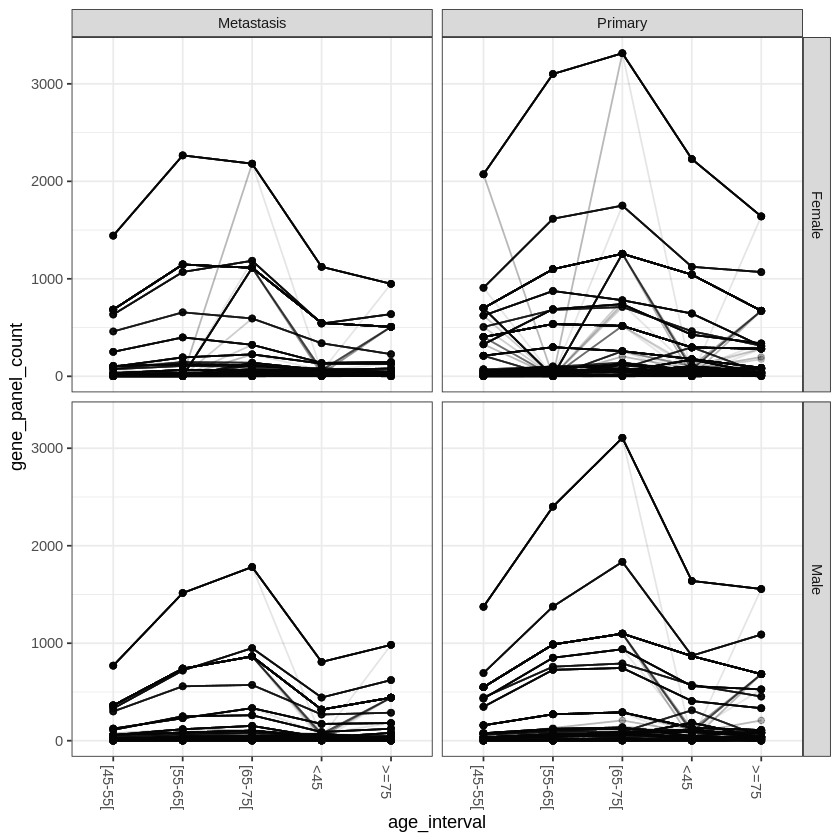

In [16]:
gene_weighted_table1$gene_panel_count <- as.integer(gene_weighted_table1$gene_panel_count)

# Then we can plot the result, just for fun.
ggplot(gene_weighted_table1, aes(x = age_interval, y = gene_panel_count, group = Hugo_Symbol)) +
  geom_line(alpha = 1/10) +
  geom_point(alpha = 1/10) +
  theme_bw() +
  facet_grid(vars(SEX), vars(SAMPLE_TYPE)) +
  theme(axis.text.x=element_text(angle = -90, hjust = 0))